In [199]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [23]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2], # стаж
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000], # з/п
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]) # условный ранг преподавателя

In [24]:
y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

In [57]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [59]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])
display(X_st)

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [60]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [61]:
def r2_score(y, y_pred):
    d1 = y_pred - y
    d2 = y - np.mean(y)
    err = 1 - d1.dot(d1) / d2.dot(d2)
    return err

In [62]:
np.random.seed(1234)
W = np.random.randn(X.shape[0])
W

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 ])

In [63]:
# классический  GD
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
#         err = r2_score(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [64]:
W = eval_model(X_st, y, iterations=200000, alpha=1e-4)
W

20000 [55.45238754  5.38690778  2.91856981  4.09459858] 27.828162012559034
40000 [56.48081998  5.78542776  1.79210265  4.86732604] 25.701763874177487
60000 [56.49964885  5.98686801  1.06310146  5.4209842 ] 25.255797694069013
80000 [56.49999357  6.10140254  0.58456915  5.80127743] 25.059724881520978
100000 [56.49999988  6.17162066  0.26831455  6.0578248 ] 24.97315531308928
120000 [56.5         6.21649031  0.05864593  6.22951277] 24.934905796615354
140000 [56.5         6.24576547 -0.08056207  6.34399517] 24.918003227097863
160000 [56.5         6.26505782 -0.17305048  6.42020647] 24.91053369363376
180000 [56.5         6.27783118 -0.23451791  6.47090216] 24.907232757098058
200000 [56.5         6.28630678 -0.27537473  6.50461316] 24.90577400499416


array([56.5       ,  6.28630678, -0.27537473,  6.50461316])

In [66]:
display(y)
y_pred = W.dot(X_st)
y_pred

array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

array([46.49485148, 46.38127074, 56.90372437, 55.32824141, 58.72873688,
       44.1019353 , 71.47373558, 82.30250912, 46.52324666, 56.76174845])

In [67]:
r2_score(y, y_pred)

0.8445817537732928

Задание № 1.
* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [243]:
iterations = 5000
alpha = 1e-2
lambda_ = np.array([0, 0.00000001, 0.000001, 0.0001, 0.01, 0.1, 1, 10]).astype(np.float64)
w_matrix = []
n = X_st.shape[1]
np.random.seed(42)

for l_ in lambda_:
    w = np.random.randn(X_st.shape[0])
    w_list = [w.copy()]
    for i in range(1, iterations+1):
        y_pred = np.dot(w, X_st)
        err = calc_mse(y, y_pred)
        new_w = w - alpha * (1/n * 2 * np.dot((y_pred - y), X_st.T) + l_ * w) 
        if i % (iterations / 10) == 0:
            print(i, l_, new_w, err)
        w_list.append(new_w.copy())
        w = new_w
#     w_list = np.array(w_list)
#     w_matrix.append(w_list.copy())
    w_matrix.append(new_w.copy())
#     w_matrix = np.array(w_matrix)
    print(f'r2_score = {r2_score(y, y_pred)}')
w_matrix = np.array(w_matrix)

500 0.0 [56.49770252  5.89985555  1.03996252  5.52755454] 25.237226830836338
1000 0.0 [56.49999991  6.195601    0.13438959  6.17194882] 24.946862504443807
1500 0.0 [56.5         6.26632893 -0.18034243  6.42645323] 24.910089654441997
2000 0.0 [56.5         6.28995897 -0.29305339  6.5192143 ] 24.905327653695743
2500 0.0 [56.5         6.29837087 -0.33359337  6.55266193] 24.904710704544648
3000 0.0 [56.5         6.30139388 -0.34818389  6.56470414] 24.904630773906575
3500 0.0 [56.5         6.30248175 -0.35343555  6.56903879] 24.904620418258805
4000 0.0 [56.5         6.3028733  -0.35532583  6.57059902] 24.904619076602536
4500 0.0 [56.5         6.30301424 -0.35600623  6.57116061] 24.904618902780342
5000 0.0 [56.5         6.30306496 -0.35625113  6.57136275] 24.90461888026028
r2_score = 0.8445889617456457
500 1e-08 [56.49767226  5.83477715  1.36781869  5.25424448] 25.413829655076317
1000 1e-08 [56.49999962  6.17124075  0.2526927   6.07416407] 24.969784416082554
1500 1e-08 [56.49999972  6.257512

In [244]:
display(w_matrix)

array([[56.5       ,  6.30306496, -0.35625113,  6.57136275],
       [56.49999972,  6.30305798, -0.35621758,  6.57133507],
       [56.49997175,  6.30305578, -0.35622277,  6.57134015],
       [56.49717514,  6.30231875, -0.35424689,  6.56978919],
       [56.21890547,  6.23067375, -0.16461982,  6.42091819],
       [53.80952381,  5.73058906,  0.98368332,  5.5160992 ],
       [37.66666667,  4.01145689,  2.67324854,  3.68757438],
       [ 9.41666667,  1.44984507,  1.33835494,  1.42938586]])

In [245]:
w_matrix.shape

(8, 4)

In [246]:
lambda_

array([0.e+00, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

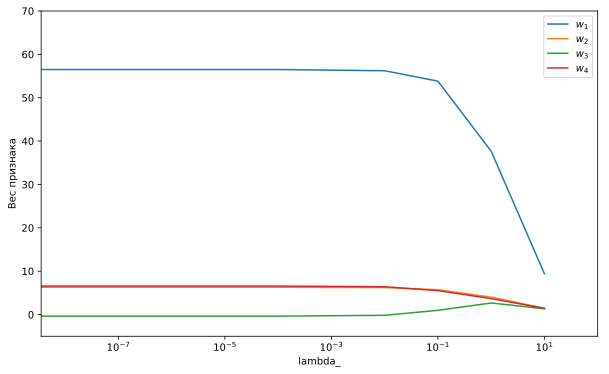

In [247]:
plt.figure(figsize=(10, 6))
plt.xscale('log')
for i in range(w_matrix.shape[1]):
    plt.plot(lambda_, w_matrix[:, i])

# plt.scatter(lambda_, w_matrix[:, 0], label=r'$w_1$')
# plt.scatter(lambda_, w_matrix[:, 1], label=r'$w_2$')
# plt.scatter(lambda_, w_matrix[:, 2], label=r'$w_3$')
# plt.scatter(lambda_, w_matrix[:, 3], label=r'$w_4$')
plt.ylim(-5, 70)
plt.xlim(-2, 100)
plt.xlabel('lambda_')
plt.ylabel('Вес признака')
plt.legend([r'$w_1$', r'$w_2$', r'$w_3$', r'$w_4$'])
plt.show()

Вывод: увеличение множителя "lambda_" заставляет модель при обучении уменьшать веса при признаках с увеличением MSE.

Задание № 2.
* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Не понятный вопрос...Применить то к признаку можно последовательно два вида приведения данных, но у меня, например, нет достаточных знаний, чтобы понять степень влияния на последующую работу модели на данном признаке и есть ли смысл в этом вообще.

Задание № 3.
* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [257]:
iterations = 5000
alpha = 1e-2
lambda_ = np.array([0, 0.00000001, 0.000001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000]).astype(np.float64)
w_matrix = []
n = X_st.shape[1]
np.random.seed(42)

for l_ in lambda_:
    w = np.random.randn(X_st.shape[0])
    w_list = [w.copy()]
    for i in range(1, iterations+1):
        y_pred = np.dot(w, X_st)
        err = calc_mse(y, y_pred)
        new_w = w - alpha * (1/n * 2 * np.dot((y_pred - y), X_st.T) + l_ * np.sign(w)) 
        if i % (iterations / 10) == 0:
            print(i, l_, new_w, err)
        w_list.append(new_w.copy())
        w = new_w
#     w_list = np.array(w_list)
#     w_matrix.append(w_list.copy())
    w_matrix.append(new_w.copy())
#     w_matrix = np.array(w_matrix)
    print(f'r2_score = {r2_score(y, y_pred)}')
w_matrix = np.array(w_matrix)

500 0.0 [56.49770252  5.89985555  1.03996252  5.52755454] 25.237226830836338
1000 0.0 [56.49999991  6.195601    0.13438959  6.17194882] 24.946862504443807
1500 0.0 [56.5         6.26632893 -0.18034243  6.42645323] 24.910089654441997
2000 0.0 [56.5         6.28995897 -0.29305339  6.5192143 ] 24.905327653695743
2500 0.0 [56.5         6.29837087 -0.33359337  6.55266193] 24.904710704544648
3000 0.0 [56.5         6.30139388 -0.34818389  6.56470414] 24.904630773906575
3500 0.0 [56.5         6.30248175 -0.35343555  6.56903879] 24.904620418258805
4000 0.0 [56.5         6.3028733  -0.35532583  6.57059902] 24.904619076602536
4500 0.0 [56.5         6.30301424 -0.35600623  6.57116061] 24.904618902780342
5000 0.0 [56.5         6.30306496 -0.35625113  6.57136275] 24.90461888026028
r2_score = 0.8445889617456457
500 1e-08 [56.49767253  5.83477719  1.36781865  5.25424451] 25.41382962593996
1000 1e-08 [56.4999999   6.17124081  0.25269258  6.07416415] 24.96978439164961
1500 1e-08 [56.49999999  6.25751279

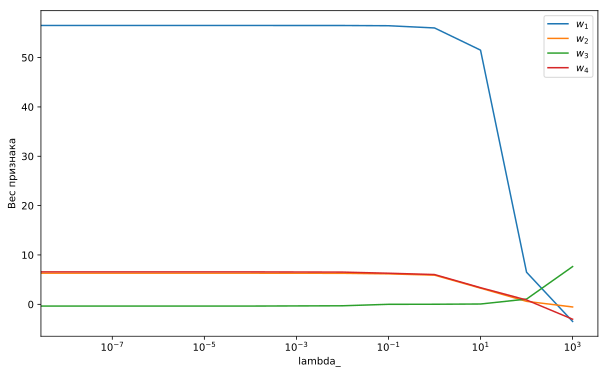

In [259]:
plt.figure(figsize=(10, 6))
plt.xscale('log')
for i in range(w_matrix.shape[1]):
    plt.plot(lambda_, w_matrix[:, i])

plt.xlabel('lambda_')
plt.ylabel('Вес признака')
plt.legend([r'$w_1$', r'$w_2$', r'$w_3$', r'$w_4$'])
plt.show()

Правильность реализации в коде алгоритма "LASSO" под вопросом...веса по идее должны обнуляться, а они, судя по графику меняют знак...